# Valores de referência de métricas

### Procedimento
- Recebe caminho para pastas com projetos e a métrica a ser avaliada
- Percorre todas as pastas nesse caminho e busca o csv daquela métrica
- Usa o pandas para salvar esse csv
- Armazena a última coluna desse csv em um array
- gera grafico de distribuição

In [18]:
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [53]:

root_path = './../../Projetos/'
metric = 'noc'
data = []
for folder in os.listdir(root_path):
    system_path = os.path.join(root_path, folder)
    metric_path = os.path.join(system_path, metric+'.csv')
    with open(metric_path, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        for line in csv_reader:
            data.append(float(line[-1])+1)
data = np.sort(data)

In [54]:
metric_df = pd.DataFrame(data=data, columns=[metric])
metric_df

,noc
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
101384,166.0
101385,213.0
101386,358.0
101387,567.0


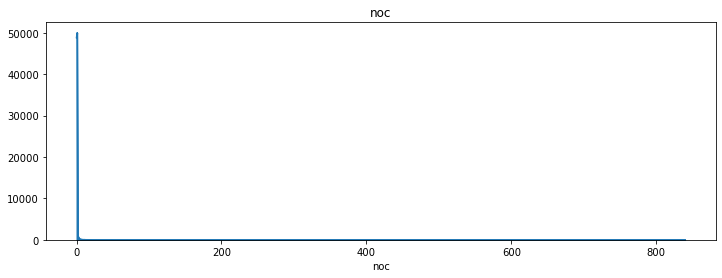

In [55]:
metric_df[metric] = metric_df[metric].apply(pd.to_numeric)

metric_df_groups  = metric_df.groupby([metric])[metric].count()
fig,axs = plt.subplots(figsize=(12,4))
metric_df_groups.plot.area(ax=axs,title=metric)

fig.savefig("./Results/"+metric+".png")

In [56]:
metric_df_groups

noc
0.0      48827
1.0      50012
2.0        858
3.0        618
4.0        257
         ...  
166.0        1
213.0        1
358.0        1
567.0        1
840.0        1
Name: noc, Length: 76, dtype: int64

In [57]:

with open("./Results/"+metric+".txt", 'w') as result_file:
    print("Average: "+str(np.average(data)), file=result_file)
    print("Standard deviation: "+str(np.std(data)), file=result_file)
    print("Percentile 70: "+str(np.percentile(data, 70)), file=result_file)
    print("Percentile 90: "+str(np.percentile(data,90)), file=result_file)